In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from os import listdir

from pandas.api.types import is_categorical_dtype
from pandas.api.types import is_datetime64_any_dtype as is_datetime

In [2]:
art = pd.read_csv("articles.csv")
art.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [3]:
cst = pd.read_csv("customers.csv")
cst.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [4]:
#trns = pd.read_csv("transactions_train.csv", nrows=999999)
trns = pd.read_csv("transactions_train.csv")
trns.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [5]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [6]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

###  Customer

In [7]:
missing_data(cst)

,Total,Percent
customer_id,0,0.000000
FN,895050,65.237831
Active,907576,66.150819
club_member_status,6062,0.441843
fashion_news_frequency,16009,1.166854
age,15861,1.156066
postal_code,0,0.000000


Only customer id and postal code are completely filled. Age, fashion news frequency have arounfd 1% misssing data, FN has 65% missing and Active has 66% missing data.

In [8]:
unique_values(cst)

,Total,Uniques
customer_id,1371980,1371980
FN,476930,1
Active,464404,1
club_member_status,1365918,3
fashion_news_frequency,1355971,4
age,1356119,84
postal_code,1371980,352899


In [9]:
cst.FN.unique()

array([nan,  1.])

update nan with 0. which represents fashion news not subscribed or Unknown

In [10]:
# updating missing values with 0 
cst["FN"].fillna(0, inplace = True) 
cst.FN.unique()


array([0., 1.])

In [11]:
cst.Active.unique()

array([nan,  1.])

update nan with 0. which represents Not Active or Unknown

In [12]:

# updating missing values with 0 
cst["Active"].fillna(0, inplace = True) 
cst.Active.unique()

array([0., 1.])

In [13]:
cst.club_member_status.unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

update nan with 'Unknown'

In [14]:
# updating missing values with 0 
cst["club_member_status"].fillna('Unknown', inplace = True) 
cst.club_member_status.unique()

array(['ACTIVE', 'Unknown', 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [15]:
cst.fashion_news_frequency.unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

Update NONE to None, update nan with 'Unknown'. Might make it flag corr to FN

In [16]:
# updating missing values with 0 
cst["fashion_news_frequency"].fillna('Unknown', inplace = True) 
cst['fashion_news_frequency'] = cst['fashion_news_frequency'].replace(['NONE'],'None')
cst.fashion_news_frequency.unique()

array(['None', 'Regularly', 'Unknown', 'Monthly'], dtype=object)

In [17]:
cst.age.unique()

array([49., 25., 24., 54., 52., nan, 20., 32., 29., 31., 56., 75., 41.,
       27., 30., 48., 35., 22., 40., 38., 45., 68., 55., 19., 60., 44.,
       21., 26., 28., 53., 33., 17., 23., 51., 18., 34., 57., 47., 70.,
       50., 63., 58., 43., 67., 72., 42., 39., 79., 71., 59., 36., 62.,
       37., 46., 73., 64., 74., 61., 85., 69., 76., 66., 65., 82., 16.,
       90., 80., 78., 81., 84., 77., 97., 89., 83., 98., 88., 86., 87.,
       93., 91., 99., 96., 94., 92., 95.])

trate nan, change age type to int

In [18]:
# updating missing values with median age
cst["age"].fillna(cst['age'].median(), inplace = True) 

In [19]:
missing_data(cst)

,Total,Percent
customer_id,0,0.0
FN,0,0.0
Active,0,0.0
club_member_status,0,0.0
fashion_news_frequency,0,0.0
age,0,0.0
postal_code,0,0.0


In [20]:
unique_values(cst)

,Total,Uniques
customer_id,1371980,1371980
FN,1371980,2
Active,1371980,2
club_member_status,1371980,4
fashion_news_frequency,1371980,4
age,1371980,84
postal_code,1371980,352899


In [21]:
cst["FN"].value_counts()

0.0    895050
1.0    476930
Name: FN, dtype: int64

In [22]:
cst["Active"].value_counts()

0.0    907576
1.0    464404
Name: Active, dtype: int64

In [23]:
cst["club_member_status"].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
Unknown          6062
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [24]:
cst["fashion_news_frequency"].value_counts()

None         877713
Regularly    477416
Unknown       16009
Monthly         842
Name: fashion_news_frequency, dtype: int64

In [25]:
477416 + 842

478258

In [26]:
877713 + 16009

893722

is FN and fashion_news_frequency column shows similar data? 

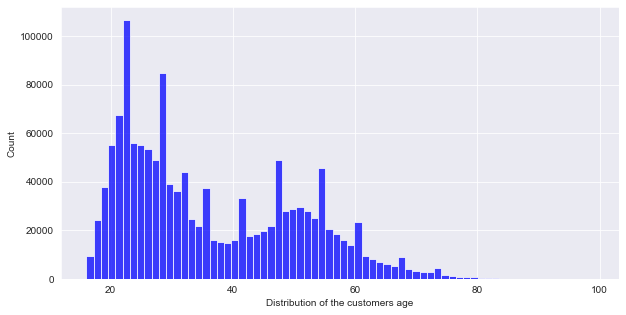

In [27]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=cst, x='age',bins=70, color='blue')
ax.set_xlabel('Distribution of the customers age')
plt.show()

### Articles

In [28]:
missing_data(art)

,Total,Percent
article_id,0,0.000000
product_code,0,0.000000
prod_name,0,0.000000
product_type_no,0,0.000000
product_type_name,0,0.000000
product_group_name,0,0.000000
graphical_appearance_no,0,0.000000
graphical_appearance_name,0,0.000000
colour_group_code,0,0.000000
colour_group_name,0,0.000000


In the article data, the only missing data is for the detailed description of the article (0.4%) missing data. Lets Update that with 'Unknown'

In [29]:
# updating missing values with 'Unknown' 
art["detail_desc"].fillna("Unknown", inplace = True)

In [30]:
missing_data(art)

,Total,Percent
article_id,0,0.0
product_code,0,0.0
prod_name,0,0.0
product_type_no,0,0.0
product_type_name,0,0.0
product_group_name,0,0.0
graphical_appearance_no,0,0.0
graphical_appearance_name,0,0.0
colour_group_code,0,0.0
colour_group_name,0,0.0


In [31]:
unique_values(art)

,Total,Uniques
article_id,105542,105542
product_code,105542,47224
prod_name,105542,45875
product_type_no,105542,132
product_type_name,105542,131
product_group_name,105542,19
graphical_appearance_no,105542,30
graphical_appearance_name,105542,30
colour_group_code,105542,50
colour_group_name,105542,50


We observe that features for which we expect to have the same number of unique value, like:

product_type_no and product_type_name, departmant_no and department_name, section_no and section_name

In [32]:
art["product_group_name"].value_counts()

Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: product_group_name, dtype: int64

In [33]:
art_filtered = art[art['product_group_name'].isin(['Garment Upper body', 'Garment Lower body', 'Garment Full body'])]
art_filtered.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
11,112679048,112679,SWEATSHIRT OC,252,Sweater,Garment Upper body,1010001,All over pattern,7,Grey,...,Baby basics,G,Baby Sizes 50-98,4,Baby/Children,44,Baby Essentials & Complements,1002,Jersey Basic,Sweatshirt in soft organic cotton with a pres...


In [34]:
art_filtered["index_group_name"].value_counts()

Ladieswear       25453
Baby/Children    25372
Divided          13006
Menswear          9330
Sport             2684
Name: index_group_name, dtype: int64

In [35]:
art_filtered = art_filtered[art_filtered['index_group_name']=='Ladieswear']

In [36]:
art_filtered = art_filtered[art_filtered['product_type_name'].isin(['Dress', 'Trousers','Sweater', 'Blouse','Top','Skirt','T-shirt','Jacket','Shirt'])]

In [37]:
art_filtered = art_filtered[art_filtered['index_name']=='Ladieswear']

In [38]:
art_filtered = art_filtered[art_filtered['section_name']!='Mama']

In [39]:
art_filtered.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
15,116379047,116379,Frugan longsleeve,254,Top,Garment Upper body,1010016,Solid,73,Dark Blue,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted top in soft stretch jersey with a wide ...
146,186372011,186372,Harem trousers,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Harem trousers in jersey with elastication at ...
147,186372042,186372,Harem trousers,272,Trousers,Garment Lower body,1010001,All over pattern,73,Dark Blue,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Harem trousers in jersey with elastication at ...
148,186372045,186372,Harem trousers,272,Trousers,Garment Lower body,1010001,All over pattern,73,Dark Blue,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Harem trousers in jersey with elastication at ...
199,189955076,189955,Nora tee,255,T-shirt,Garment Upper body,1010010,Melange,71,Light Blue,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Top in soft slub jersey with a fake front pock...


In [40]:
art_filtered.shape

(19361, 25)

In [41]:
art_filtered["graphical_appearance_name"].value_counts()

Solid                  10437
All over pattern        3071
Melange                 1206
Stripe                  1141
Denim                    705
Check                    448
Lace                     446
Embroidery               345
Jacquard                 336
Other structure          211
Front print              190
Dot                      133
Application/3D           127
Glittering/Metallic      126
Sequin                    95
Treatment                 62
Colour blocking           58
Placement print           42
Contrast                  33
Unknown                   29
Metallic                  27
Neps                      23
Mixed solid/pattern       22
Other pattern             21
Mesh                      13
Slub                       8
Chambray                   4
Transparent                2
Name: graphical_appearance_name, dtype: int64

In [42]:
art_filtered["colour_group_name"].value_counts()

Black              4748
White              2069
Dark Blue          1641
Light Beige        1090
Off White           930
Beige               707
Light Blue          586
Greenish Khaki      574
Red                 534
Grey                529
Blue                524
Light Pink          516
Dark Green          511
Dark Red            423
Dark Grey           402
Pink                304
Yellow              284
Dark Beige          274
Yellowish Brown     269
Light Grey          262
Light Orange        258
Dark Orange         253
Green               193
Light Yellow        176
Orange              165
Dark Pink           149
Dark Turquoise      130
Light Green         119
Dark Yellow         107
Light Turquoise      91
Light Purple         73
Greyish Beige        62
Turquoise            62
Light Red            61
Dark Purple          59
Purple               35
Other Pink           29
Other                28
Unknown              22
Silver               21
Other Blue           21
Other Green     

In [43]:
art_filtered["perceived_colour_value_name"].value_counts()

Dark            8168
Dusty Light     4310
Light           2757
Medium Dusty    2301
Bright           896
Medium           879
Undefined         28
Unknown           22
Name: perceived_colour_value_name, dtype: int64

In [44]:
art_filtered["perceived_colour_master_name"].value_counts()

Black              4753
White              3029
Blue               2769
Beige              1659
Grey               1109
Red                1057
Pink                980
Green               727
Khaki green         697
Orange              539
Yellow              527
Brown               443
Mole                300
Unknown             270
Turquoise           258
Lilac Purple        172
Metal                40
undefined            28
Yellowish Green       4
Name: perceived_colour_master_name, dtype: int64

For colors, colour_group_name is too sparse

In [45]:
art_filtered["department_name"].value_counts()

Jersey                        2734
Blouse                        2134
Dress                         2087
Knitwear                      1826
Trouser                       1523
Jersey fancy                  1143
Jersey Basic                   954
Blouse & Dress                 833
Outwear                        758
Skirt                          726
Woven top                      682
Equatorial Assortment          359
Take Care External             330
Woven bottoms                  327
Woven Occasion                 324
Trousers & Skirt               319
Jersey/Knitwear Premium        304
Woven Premium                  299
Studio Collection              211
Campaigns                      194
Loungewear                     179
Knitwear Basic                 166
OL Extended Sizes              133
Jersey Occasion                132
Limited Edition                129
Conscious Exclusive            120
Shorts & Skirts                106
Asia Assortment                 92
Everyday Waredrobe D

In [46]:
art_filtered["section_name"].value_counts()

Womens Everyday Collection        6108
Womens Tailoring                  2831
Womens Casual                     2361
Womens Trend                      2119
H&M+                              1896
Womens Everyday Basics            1120
Womens Premium                    1059
Womens Jackets                     653
Special Collections                488
Collaborations                     330
Ladies Denim                       213
Womens Nightwear, Socks & Tigh     179
Ladies Other                         4
Name: section_name, dtype: int64

In [47]:
art_filtered["garment_group_name"].value_counts()

Jersey Fancy         3889
Blouses              3649
Dresses Ladies       2543
Knitwear             2296
Trousers             2169
Unknown              1316
Jersey Basic          954
Outdoor               766
Skirts                726
Special Offers        471
Trousers Denim        213
Under-, Nightwear     179
Shorts                106
Dressed                84
Name: garment_group_name, dtype: int64

Exclude 'garment group name', 'section name'

In [48]:
art=art_filtered

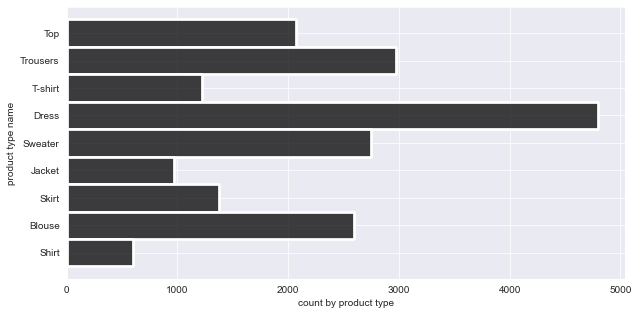

In [49]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data=art, y='product_type_name', color='black')
ax.set_xlabel('count by product type')
ax.set_ylabel('product type name')
plt.show()

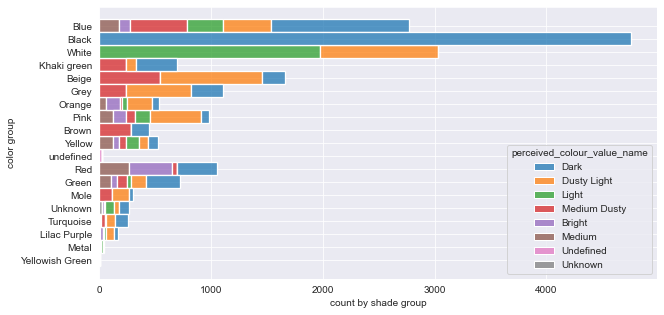

In [50]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data=art, y='perceived_colour_master_name', color='red', hue='perceived_colour_value_name', multiple="stack")
ax.set_xlabel('count by shade group')
ax.set_ylabel('color group')
plt.show()

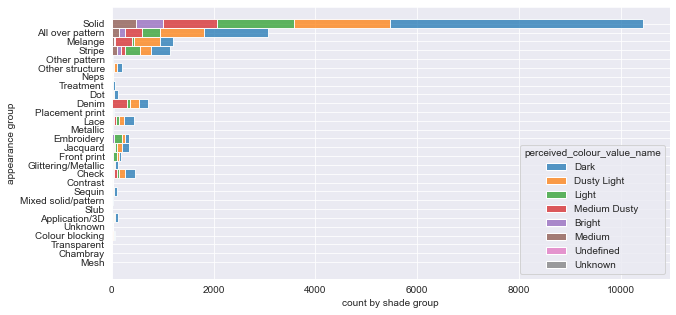

In [51]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data=art, y='graphical_appearance_name', color='red', hue='perceived_colour_value_name', multiple="stack")
ax.set_xlabel('count by shade group')
ax.set_ylabel('appearance group')
plt.show()

In [52]:
pd.DataFrame(art.groupby(['product_group_name']).count()['article_id'])

,article_id
product_group_name,
Garment Full body,4799
Garment Lower body,4352
Garment Upper body,10210


In [53]:
pd.DataFrame(art.groupby(['product_type_name','graphical_appearance_name']).count()['article_id'])

article_id
product_type_name graphical_appearance_name            
Blouse            All over pattern                  672
                  Application/3D                      8
                  Chambray                            1
                  Check                              39
                  Contrast                            6
...                                                 ...
Trousers          Sequin                              7
                  Solid                            1562
                  Stripe                            159
                  Treatment                          44
                  Unknown                            12

[187 rows x 1 columns]

In [54]:
pd.DataFrame(art.groupby(['product_group_name', 'product_type_name', ]).count()['article_id'])

article_id
product_group_name product_type_name            
Garment Full body  Dress                    4799
Garment Lower body Skirt                    1379
                   Trousers                 2973
Garment Upper body Blouse                   2596
                   Jacket                    972
                   Shirt                     602
                   Sweater                  2745
                   T-shirt                  1226
                   Top                      2069

In [55]:
art.shape

(19361, 25)

In [56]:
art_sampled=art.groupby('product_type_name', group_keys=False).apply(lambda x: x.sample(frac=0.1))

In [57]:
art_sampled.shape

(1936, 25)

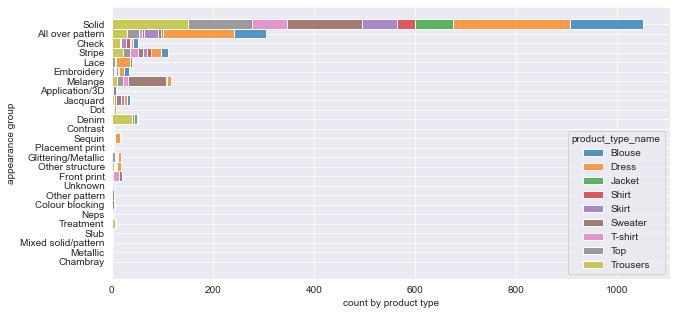

In [58]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data=art_sampled, y='graphical_appearance_name', color='red', hue='product_type_name', multiple="stack")
ax.set_xlabel('count by product type')
ax.set_ylabel('appearance group')
plt.show()

### Transactions

In [59]:
trns.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


In [60]:
# filter data for smaller time frame 
trns_short = trns[trns['t_dat']>'2019-12-31']
trns_short.shape

(10967372, 5)

In [61]:
articles_for_merge = art_sampled[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name','perceived_colour_value_name']]
articles_for_merge = trns_short[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='inner')
print(articles_for_merge.shape)

(383453, 9)


In [62]:
articles_for_merge.customer_id.nunique()

209267

In [63]:
articles_for_merge.article_id.nunique()

1280

In [64]:
art_sampled.article_id.nunique()

1936

In [65]:
articles_for_merge.to_csv('articles_for_merge.csv', index=False)

In [67]:
articles_for_merge_full = art[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name','perceived_colour_value_name']]
articles_for_merge_full = trns_short[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge_full, on='article_id', how='inner')
print(articles_for_merge.shape)

(3474580, 9)


In [68]:
articles_for_merge_full.customer_id.nunique()

583584

In [69]:
articles_for_merge_full.article_id.nunique()

12574

In [70]:
articles_for_merge_full.to_csv('articles_for_merge_full.csv', index=False)